# Linear Regression In Python

Regression models are used to predict target variables on a continuous scale
The goal of simple linear regression is to model the relationship of a single feature (explanatory variable x) and a continuous valued reponse (target variable y)

simple linear regression equation
yhat = w0 + w1x

Where w0 is the intercept and w1 is the coefficient of the explanatory variable
Goal: Learn the weights of the linear ewquation to describe the relationship between explanatory variable and target variable, which can be used to predict responses of new explanatory variables that were not part of training set.

Find best straight line (regression line) through data points of sample

Errors are represented by residuals, the differences between actual (y) and predicted (yhat)


We can generalize this model to multiple explanatory variables:

yhat = w0x0 + w1x1 + w2x2 + ... wmxm

or via linear algebra:

w^Tx weight vector transposed * feature vector x, in this case a 5x1 weight vector tranposed is 1x5
therefore, when we take the dot product of the weight vector and a 5x1 feature vector, we get a single scalar

where w0 is the y axis intercept with x0 = 1

In [1]:
# Let's use housing data from UCI to explain linear regression

import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header = None, sep = '\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Exploratory Data Analysis 
Create a scatterplot matrix

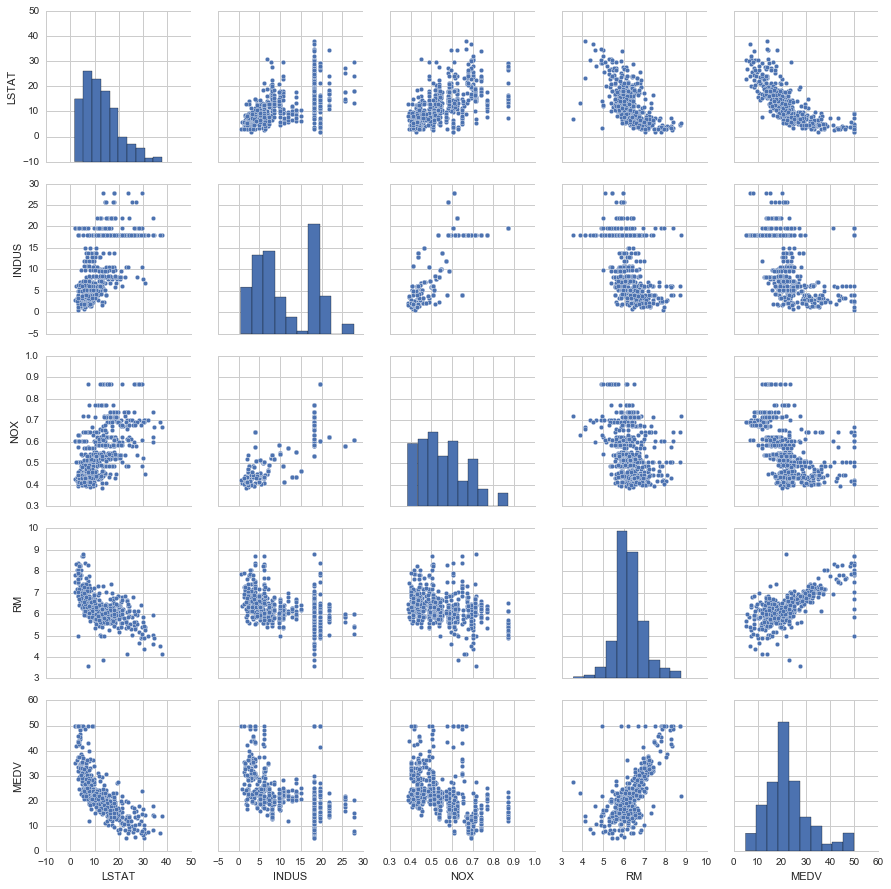

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid',context='notebook')

cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols], size = 2.5)
plt.show()

RM has a linear relationship with MEDV, as well as LSTAT, which looks more quadratic, let's now look at  a correlation plot to determine what variables have the highest correlation with MEDV

/Users/patrickcorynichols/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/patrickcorynichols/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


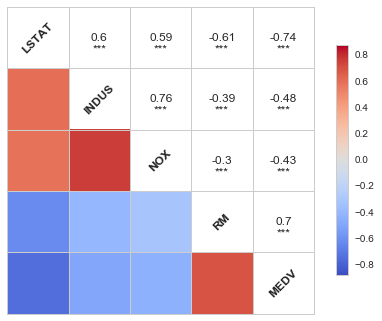

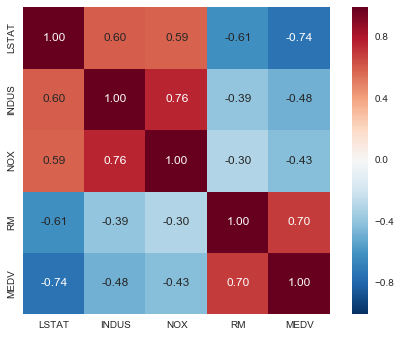

In [3]:
import numpy as np
corrmatrix = np.corrcoef(df[cols].values.T)
#http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.corrcoef.html for why we have to transpose here
sns.corrplot(df[cols])
plt.show()
sns.heatmap(corrmatrix,cbar=True,annot=True,square=True,fmt='.2f',yticklabels=cols,xticklabels=cols)

We are interested in those features that have a high correlation with our target variable MEDV (but also do not have a high correlation with each other, as we could overfit and have a collinearity issues)

Here we choose RM to model MEDV because of a more expressive linear relationship and also a high correlation

### How Do We Determine "Best Fit?"

Ordinary Least Squares method estimates the parameters of the regression line that minimizes the sum of squared vertical distances or errors to the sample points

### Solving For Regression Parameters With Gradient Descent

Minimize the OLS Cost Function: J(w) = 1/2 * ∑ i=1 ... n for (y^(i) - yhat^(i))^2
Where yhat is the predicted value yhat = w^Tx

In [21]:
# gradient descent

class LinearRegressionGD(object):
    def __init__(self, eta=0.001,n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X) # get the predicted value from net_input below
            errors = (y - output) # capture the errors 
            self.w_[1:] += self.eta * X.T.dot(errors) # multiply learning rate eta by X transpose times the error
            # then adjust coefficient weights self.w with result
            self.w_[0] += self.eta * errors.sum() # adjust intercept based on total error of model
            cost = (errors**2).sum() / 2.0 # square the error, sum and divide by 2
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # multiply coefficients by values, add on intercept
    
    def predict(self,X):
        return self.net_input(X)

In [22]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std,y_std)

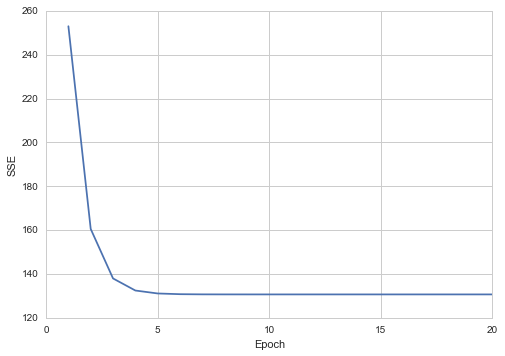

In [23]:
# when using algorithms like gradient descent, it is always good to plot the cost to check for convergence

plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

lr3 = LinearRegression()
lr3.fit(df[['RM']].values, df['MEDV'].values)
print lr3.intercept_, lr3.coef_, lr.w_

-34.6706207764 [ 9.10210898] [ -4.83169060e-16   6.95359947e-01]


In [470]:
# now let's visualize how well the linear regression line fits the data
# this visualization uses variable values established in the class to predict the values that make up the LR line
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue') # plot the data points in the set
    plt.plot(X, model.predict(X), color = 'red') # plot the regression line with Y values from the predict method
    return None

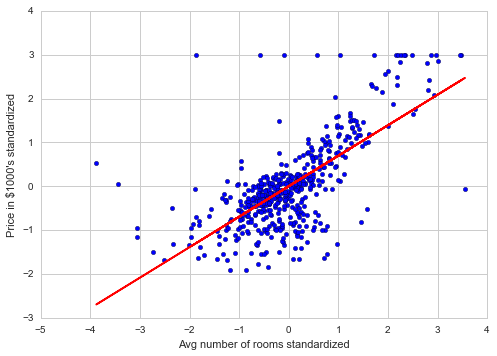

In [471]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Avg number of rooms standardized')
plt.ylabel('Price in $1000\'s standardized')
plt.show()

We notice this line doesn't fit the data terribly well. Also, there is a cut off at 3, which suggests prices may have been clipped. 

In [472]:
# we can also convert the data back to original scale using inverse_transform from the standardscaler
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print 'Price in 1000s: %.3f' % sc_y.inverse_transform(price_std)

Price in 1000s: 10.840


## Estimating The Coefficient of a Regression Model via ScikitLearn

Using scikitlearn's LinearRegression object

In [473]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression() # instatiate LinearRegression object
slr.fit(X,y) # fit training set X and target variable y
print 'Slope is %.3f' % slr.coef_[0], 'with an intercept of %.3f' % slr.intercept_

Slope is 9.102 with an intercept of -34.671


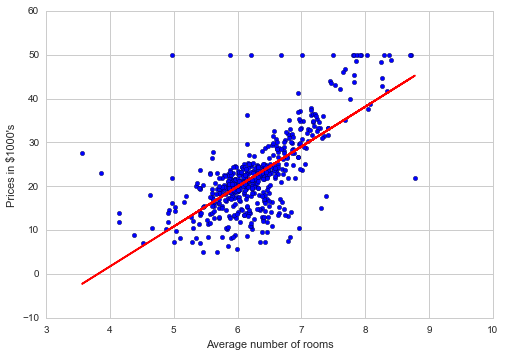

In [474]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms')
plt.ylabel('Prices in $1000\'s')
plt.show()

We can also use a closed form solution for solving OLS involving a system of linear equations
w = (X^TX)^-1X^Ty


In [475]:
Xb = np.hstack((np.ones((X.shape[0],1)),X))
z = np.dot(np.linalg.inv(np.dot(Xb.T,Xb)),np.dot(Xb.T,y))

This method is guaranteed to find the optimal solution analytically, however, if we are working with large attribute data sets, this method may not work -- it may be too computationally expensive to invert the matrix in the formula (called the normal equation) or the sample matrix may be singular, which is why we may prefer iterative methods such as gradient descent.

## Fitting a Robust Regression Model Using RANSAC

Linear Regression models can be heavily influenced by outliers, in certain situations a very small subset of data can have a large effect on the estimated model coefficients. 

Instead of throwing out outliers, we can look at robust methods using the RANdom SAmple Consensus algorithm, which fits a regression model to a subset of the data called the 'inliers'

Algorithm works as follows:
1. Select a random number of samples to be inliers and fit the model
2. Test all other data points against the fitted model and add those pounts that fall within a user-given tolerance to the inliers
3. Refit the model using all inliers
4. Estimate the error of the fitted model versus the inliers
5. Terminate algorithm if performance meets a certain user defined threshold or if a fixed number of iterations has been reached, otherwise go back to step 1

In [476]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials = 100,
                         min_samples = 100,
                         residual_metric = lambda x: np.sum(np.abs(x), axis=1),
                         #residual_threshold = 5.0,
                         random_state = 0)
ransac.fit(X,y)
print ransac.estimator_.coef_[0]
print ransac.estimator_.intercept_

[ 9.87041617]
[-38.35756116]


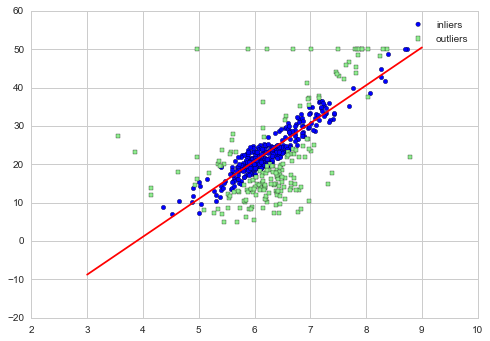

In [477]:
inlier_mask = ransac.inlier_mask_
outlier_mask =np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis]) # can use reshape as well
#print line_X.reshape(7,1) 
plt.scatter(X[inlier_mask], y[inlier_mask], c = 'blue', marker = 'o', label = 'inliers') 
# plot those points that are part of the inlier set on X and Y
plt.scatter(X[outlier_mask], y[outlier_mask], c = 'lightgreen', marker = 's', label = 'outliers')
plt.plot(line_X, line_y_ransac, color = 'red')
plt.legend(loc='best')


## Evaluating the Performance of Multiple Linear Regression Models

In [478]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#df['LSTAT'] = df['LSTAT'].values**3

X = df.iloc[:,:-1].values # this grabs all rows, and all columns except for the last one
y = df['MEDV'].values # this grabs one column
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [479]:
# there was definitely a curved relationship between LSTAT and MEDV, let's account for that

quad = PolynomialFeatures(degree=2)
test = df['LSTAT'].values[:,np.newaxis] # new column vector
test = quad.fit_transform(test) # transform it into a polynomial
df2 = pd.DataFrame(test).join(df) # append the polynomials  to the dataset
del df2['LSTAT']


In [480]:
# fit model on original data
X = df.iloc[:,:-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print slr.coef_

[ -1.21310401e-01   4.44664254e-02   1.13416945e-02   2.51124642e+00
  -1.62312529e+01   3.85906801e+00  -9.98516565e-03  -1.50026956e+00
   2.42143466e-01  -1.10716124e-02  -1.01775264e+00   6.81446545e-03
  -4.86738066e-01]


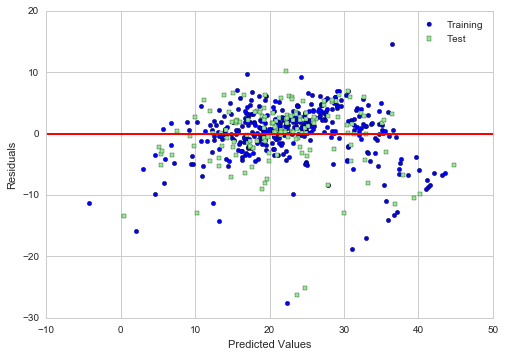

(354, 13)

In [485]:
# examine residuals for model performance diagnosis of outliers and nonlinearity and to check if errors 
# are randomly distributed

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue',marker='o', label='Training') # training model residuals
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen',marker='s', label='Test')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.hlines(y=0, xmin = -20, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10,50])
plt.legend(loc='best')
plt.show()

In [490]:
# fit model on data with polynomial LSTAT
X = df2.iloc[:, :-1].values
y = df2['MEDV'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.3,random_state=0)
slr2 = LinearRegression()
slr2.fit(X_train2, y_train2)
y_train_pred2 = slr2.predict(X_train2)
y_test_pred2 = slr2.predict(X_test2)
y_train2.shape

(354,)

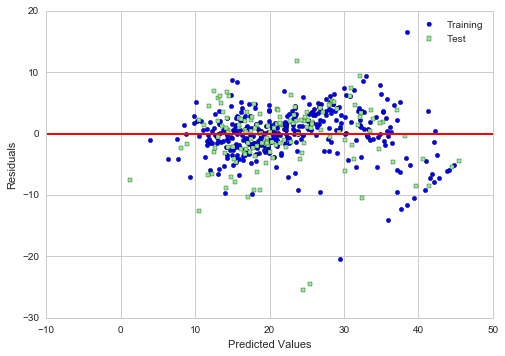

In [491]:
plt.scatter(y_train_pred2, y_train_pred2 - y_train2, c='blue',marker='o', label='Training') # training model residuals
plt.scatter(y_test_pred2, y_test_pred2 - y_test2, c='lightgreen',marker='s', label='Test')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.hlines(y=0, xmin = -20, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10,50])
plt.legend(loc='best')
plt.show()

For a good model, we would expect residuals to be randomly distributed around center line
We see above a slight non-linear pattern to the residuals, indicating maybe a need for quadratic terms in our data

We can also use the mean squared error to judge a model's performance:

In [492]:
from sklearn.metrics import mean_squared_error,r2_score
print 'MSE train: %.3f, MSE test %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test,y_test_pred))

MSE train: 19.958, MSE test 27.196


A much higher MSE as in above indicates overfitting of our model to the training dataset. Let's also use rsquared to calculate the amount of response variance that is captured by the model. R^2 = 1 - SSE/SST where SST = ∑i = 1 ... n for (y^(i) - ybar)^2

In [493]:
print 'R^2 train %.3f, R^2 test %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred))

R^2 train 0.765, R^2 test 0.673


## Regularlized Regression Methods to Prevent Overfitting

Ridge regression, Least Absolute Shrinkage and Selection Operator and Elastic Net are popular methods for regularlized regression


### Ridge Regression

Ridge regression is an L2 penalized model where we add the squared sum of the weights to our least squares cost function

J(w) = ∑ i = 1...n for ( y ^(i) - yhat ^(i) )^2 + lambda ||w||22 

    Where L2: lambda ||w||22 = lambda∑ j = 1...m for wj^2

We do not regularlize the intercept term w0

### LASSO

Leads to sparse models with L1 penalty -- certain weights can become zero, which also makes LASSO useful as a supervised feature selection technique. Add absolute value of weights to cost function

J(w) = ∑ i = 1...n for ( y ^(i) - yhat ^(i) )^2 + lambda ||w||1

    Where L1: lambda ||w||1 = lambda∑ j = 1...m for |Wj|
    
A limitation of the LASSO is that it selects at most n variables if m > n (attributes > rows) 

### Elastic Net

The Elastic Net has an L1 penalty to generate sparsity as well as an L2 penalty to overcome some of the limitations of LASSO, such as the number of selected variables or features.

J(w) = ∑ i = 1...n (y^(i) - yhat^(i))^2 + lambda1∑ j - 1...m Wj^2 + lambda2∑j=1...m |Wj|

All regularlized regression models are available via scikit learn and the usage is similar to the regular regression model except that we have to specify the regularlization strength via the parameter lambda, for example, optimized via k-fold cross-validation.

In [494]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [495]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [496]:
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5) # if we set l1 to 1.0, Elastic Net = LASSO

## Turning a Linear Regression Model Into A Curve - Polynomial Regression

y = w0 + wx1x + w2x^2+ ... + wdx^d where d denotes the degree of the polynomial 

This is still considered multiple linear regression because of the linear regression coefficients w

Contrary to belief, variables dont necessarily need to be normal to fit a regression model

We can use the PolynomialFeatures transformer class from sklearn to add a quadratic term (d=2) to a simple regression problem with one explanatory variable

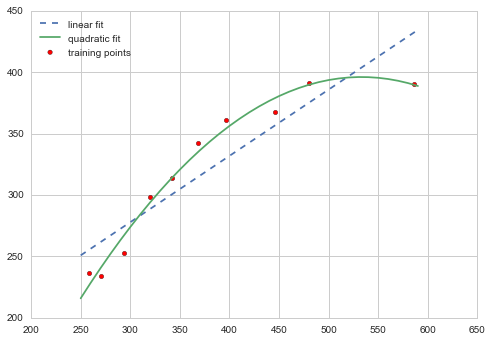

In [503]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0,270.0,294.0,320.0,342.0,368.0,396.0,446.0,480.0,586.0])[:,np.newaxis]
y = np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368.0,391.2,390.8])
lr = LinearRegression()
pr = LinearRegression() # polynomial regressor

quadratic = PolynomialFeatures(degree=2) # set up a PolynomialFeatures variable with a squared term

X_quad = quadratic.fit_transform(X) # transform X array to quadratic

# set up the test data set
X_test_data = np.arange(250,600,10)[:, np.newaxis]

# fit a simple model on original data
lr.fit(X,y)
y_predict = lr.predict(X_test_data) # returns an array of predicted values

# fit a multiple regression model on transformed features for polynomial regression
pr.fit(X_quad, y) # fit model coefficients on original
y_quad_predict = pr.predict(quadratic.fit_transform(X_test_data)) # predict test data

# plot the difference 
plt.scatter(X, y, label = 'training points', c = 'red') # plot original dataset
plt.plot(X_test_data, y_predict, label='linear fit', linestyle = '--') # plot the linear regression line
plt.plot(X_test_data, y_quad_predict, label= 'quadratic fit') # plot the polynomial line
plt.legend(loc='best')
plt.show()


In [504]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print 'Training MSE linear: %.3f, quadratic %.3f' %(mse(y,y_lin_pred), mse(y,y_quad_pred))
print 'Training R^2 linear: %.3f, quadratic %.3f' %(r2(y, y_lin_pred), r2(y,y_quad_pred))

Training MSE linear: 569.780, quadratic 61.330
Training R^2 linear: 0.832, quadratic 0.982


## Modeling NonLinear Relationships in The Housing Dataset

(506, 4)


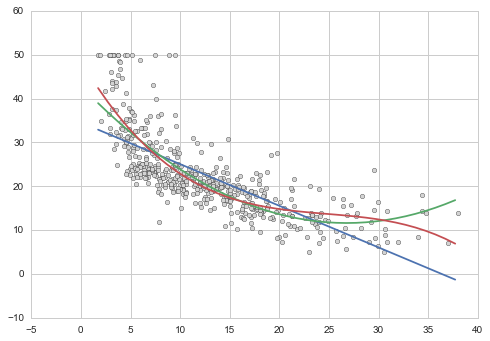

In [317]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()



# create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# set up test set
X_fit = np.arange(X.min(), X.max(),1)[:,np.newaxis]

# linear fit
regr = regr.fit(X,y)
y_linear_pred = regr.predict(X_fit)
linear_r2 = r2(y, regr.predict(X))

# quadratic fit
regr = regr.fit(X_quad, y) # fit to quadratic values of LSTAT
y_quad_pred = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2(y, regr.predict(X_quad))

# cubic fit
regr = regr.fit(X_cubic,y)
y_cubic_pred = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2(y, regr.predict(X_cubic))


plt.scatter(X,y, c='lightgray')
plt.plot(X_fit, y_linear_pred)
plt.plot(X_fit, y_quad_pred)
plt.plot(X_fit, y_cubic_pred)
